# Hypothesis testing, composite case

*Author: Jose A. Hernando*, January 2020

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*


In [1]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Fri Feb 11 18:34:27 2022


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind')

import htcore     as htcore
import httoys     as httoys
import htcatalog  as htcata
import htplot     as htplot
import htcomposite_examples as htexam

# ploting images
from IPython.display import display, Image

## Introduction

We have considered the case of an alternative **single** hypothesis $H_1$ with respect the null hypothesis $H_0$. 

But in some cases, the hypothesis depends on a parameter(s), the **strength parameter, $\mu$**. That is $H_1(\mu)$, with $H_1(\mu = \mu_0) = H_0$. These are **composite** hypotheses.

For example, in a search for a neutrino-less double beta decay, we do not know the half-life time. Or we search for a dark-matter candidate but we do know not its cross-section.

The result of a composite hypothesis testing is now a confidence interval on the $\mu$ parameter.

FC provides the method to compute the CI, but it sometimes requires large computation simulations. 

In some cases the Wilk's theorem allow us to treat the problem without the massive simulations.

----

## 1. Profile likelihood scan

Let's consider a simple example. The null hypothesis a gaussian with $\mu_0=0$ and sigma unity. And the alternative is a gaussian with $\mu$ positive and sigma one.


If $\mu = 3$ half of the observations will indicate an observation at Z=3.

If $\mu=5$ half of the observation will imply discovery or Z=5.

In the other hand, if $\mu_{true} = 0$ we can set an upper limit on $\mu$ at 90% CL at 1.28 Z for. This is the maximum value of $\mu$ which gaussian penetrates in the negative region 10%. 

**Explore** the $\mu$ separation between both gaussian. Modify also $\sigma$ of the gaussian.

observed data : [-1.0341462]
H0 p-value    : 0.84946609
H1 p-value    : 0.00002740
CLs           : 0.00018202 


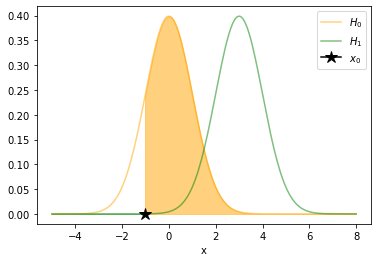

In [3]:
mu = 3.
httoys.gaussian(0., mu, sigma1 = 1.);

The main question is:

**How extreme** a data $x$ is respect a given hypothesis $\mu$?

FC have already quatified that answer. We need to compute the distance:

$$
t_\mu( x) = -2 \ln \, \frac{ \mathcal{L}( x \, | \mu)}{ \mathcal{L}( x \, | \, \hat{\mu}( x))}
$$

Low values, close to zero, of $t_\mu(x)$ indicates "good" data.

Large values of $t_\mu(x)$ indicate extreme data.




Note that $\hat{\mu}(x)$ is the best-estimate of $\mu$ given a data $x$.

Usually  $\hat{\mu}(x)$ is the value of $\mu$ that maximizes the likelihood $\mathcal{L}(x | \mu)$, that is the MLE (Maximum Likelihood Estimate).

FC relates the likelihood of a data $x$ with respect an hypotesis $\mu$, $\mathcal{L} (x |\mu)$, with the likelihood,$\mathcal{L}(x |\hat{\mu}(x))$ , with respect the best-estimate $\hat{\mu}(x)$ obtained with $x$. 

The pdf, $g(t_\mu | \mu)$, where $\mu$ is the true value, will allow us to quantifie the $1-\beta$ (i.e 10%) more extreme events, the "worse" events.

For that, we need to compute that pdf, $g(t_\mu | \mu)$, by default it implies to simulate large number of data and generate the distribution of $t_\mu$.

In certain cases, "when we are in the gaussian domain", the $t_\mu$ has the nice property that its pdf, $g(t_\mu | \mu)$, is a $\chi^2$ distribution with n degree-of-freedom (n is the dimension of $\mu)$.

This is a consequence of the **Wilk's theoreme**.

Usually if the likelihood is regular enough and the estimates are gaussian distributed the Wilk's conditions are fulfilled.


Note: We use this property in *regresion*, when we obtain errors of $\hat{\mu}$ with the MLE! 

We define the errors as at the value where the delta likelihood scan has increased in 1/2 unit respect the minimun of the likelihood!

Let's consider a simple example that fulfills the Wilk's theoreme: a gaussian distribution.

**Example**: Consider a gaussian distribution with unknown positive mean $\mu$ and sigma one, while the null hypothesis is $\mu_0 = 0$ and sigma one. Verify that $t_\mu$ is distributed with a $\chi^2(1)$.


mean muhat :  2.0015597656250006 , std 1.0102648972676513


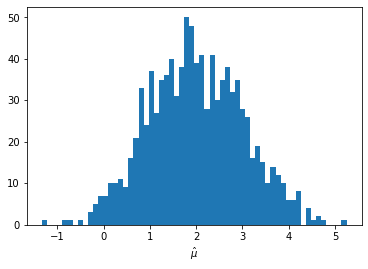

In [4]:
mu, sigma, size  = 2., 1., 1000
par, mask = (mu, sigma), (True, False)
rv        = stats.norm
xs        = rv.rvs(mu, sigma, size = size)
ht        = htcore.htcomposite(rv, par, mask = mask)
muhats    = [float(ht.mubest(xi))  for xi in xs]
tmus      = [ht.tmu(xi, mu)        for xi in xs]
print('mean muhat : ', np.mean(muhats), ', std', np.std(muhats))
plt.hist(muhats, 60); plt.xlabel(r'$\hat{\mu}$');

chi2  1.02063611304276
p-value mean : 0.5130582365684075 ; std * sqrt(12.) : 0.9968037509944598


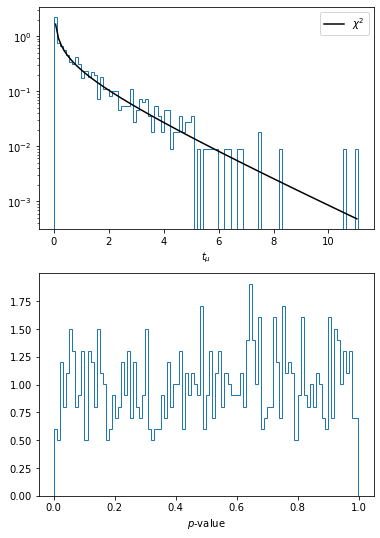

In [5]:
htplot.chi2_test(tmus, nbins = 100, label = r'$t_\mu$')

**Exercise**: Consider the case of a poisson distribution with a unknown mean $\mu$ and the null hypothesis $\mu_0$. Check for what values of $\mu$, $g(t_\mu | \mu)$ follows a $\chi^2(1)$ distribution.

**Exercise**: Consider the case of an experiment that get a sample of n-size poisson disbruted values, $x$, with a unknown mean $\mu$. Check the values of $n$ for whose $g(t_\mu | \mu)$ follows a $\chi^2(1)$ distribution.

### 1.1 Profile likelihood ratio 

We are back to the construct a CI of $\mu$ at $\beta$ CL given data $x_0$.

In the "gaussian" regime, we can profit from the simple relation between $t_\mu(x_0)$ and its p-value, $p_\mu$, via the $\chi^2(1)$ distribution:

$$
p_\mu = 2 \, (1 - \Phi(\sqrt{t_\mu(x_0)}))
$$

Where $\Phi(x)$ is the cumulative function of a normal gaussian.


We can now:

- define a CI of $\mu$ at $\beta$ CL, for those values wich $p_\mu >= 1-\beta$.

- clain observation (discovery) of $H_1(\mu_0)$ when $p_0$ has a Z-value $\ge 3$ (5).

**Example**: Consider a gaussian distribution with fix sigma and unknown $\mu$, and the null hypothesis is $\mu_0$. Generate an observation data, $x_0$, and compute the CI of $\mu$ at $\beta$ CL using the $t_\mu(x_0)$ variable. Consider $\mu=3$ and $\beta = 0.68$.

**Explore**: Change the size of the data.

In [8]:
mu, sigma, size = 3., 1., 2
par, mask       = (mu, sigma), (True, False)
rv              = stats.norm
ht              = htcore.htcomposite(rv, par, mask = mask)
x0      = rv.rvs(*par, size = size)
parbest = ht.parbest(x0) 
print('observed data ', x0, ', best par ', parbest)

observed data  [3.57242656 3.27784801] , best par  [3.4251709 1.       ]


central CI  : [2.72194937 4.1283252 ] at  68 % CL


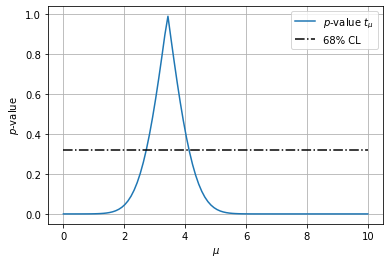

In [9]:
mu0, mu1, nmus, beta = 0, 10, 100, 0.68
mus   = np.linspace(mu0, mu1, nmus)
tmus  = [ht    .tmu(x0, mui, parbest = parbest) for mui  in mus]
ptmus = [htcore.tmu_pvalue(tmui)                for tmui in tmus]
ci     = ht.tmu_cint(x0, beta = beta)
 
htplot.prt_wilks_pvalues(beta, ci_central = ci)
htplot.plt_wilks_pvalues(beta, mus, ptmus = ptmus);

### 1.2 testing the null-hypothesis

In same cases the strength parameter $\mu \ge \mu_0$, therefore the values of $\hat{\mu}(x) \lt \mu_0$ do not challenge $H_0$.

If we define:

$$
\lambda(\mu) = \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x | \hat{\mu}(x))}
$$

To check the compatibility with $\mu_0$, we can use:

$$
q_0 = \left\{ \begin{array}{ll}  
-2 \ln \lambda(\mu_0) & \mbox{if $\hat{\mu}(x) > \mu_0$} \\
0 & \mbox{if $\hat{\mu}(x) \le \mu_0$}
\end{array} \right. 
$$ 


Now the pdf, $g(q_0 \, | \mu_0)$, will be now a "half" $\chi^2$ distribution. 

In this case there is even a simple relation with the $p$-value of $H_0$, the *goodness-of-fit* of $H_0$.

$$
p_0 = 1-\Phi(\sqrt{q_0})
$$

That translates directly into number of sigmas, $Z$:

$$
Z = \sqrt{q_0}
$$

**Example**: In the case of a gaussian hypothesis with mean $\mu$ positive and sigma one, and the null hypothesis $\mu_0 = 0$. Generate an observation data for the case $\mu_{true} = 3$ and compute the $p$-value and $Z$-value of $H_0$.

In [8]:
mu0, mutrue, sigma, size = 0., 3., 1., 1
par, mask               = (mutrue, sigma), (True, False)
x0    = stats.norm.rvs(*par, size = size)
ht    = htcore.htcomposite(stats.norm, par, mask = mask)

parbest = ht.parbest(x0)
q0      = ht.q0(x0, mu0)
p0      = htcore.q0_pvalue(q0)
print('x0 ', x0, 'parhat ', parbest)
print('q0 ', q0, 'p-value', p0, 'Z-value', np.sqrt(q0))

x0  [2.40251017] parhat  [2.40249023 1.        ]
q0  5.77205509427897 p-value 0.008141490999044487 Z-value 2.40251016528109


**Exercise** Verify that the $q_0$ distribution is a 'half'-$\chi^2$.

### 1.3 Testing the alternative hypothesis

To set a **upper** limit on the value of $\mu$, the $\hat{\mu}$ above $\mu$ do not challege the alternative hypothesis.

With:

$$
\lambda(\mu) = \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x | \hat{\mu}(x))}
$$



We can now construct:

$$
q_\mu = \left\{ \begin{array}{ll} 
-2 \ln \lambda(\mu) & \mbox{if $\hat{\mu}(x) \le \mu$} \\
0 & \mbox{if $\hat{\mu}(x) \gt \mu$}
\end{array} \right.
$$



Again the pdf, $g(q_\mu | \mu)$  is a "half" $\chi^2$ distribution.

And computing p-value of the $H_1(\mu)$ hypothesis is very simple:

$$
p_\mu = 1 - \Phi(\sqrt{q_\mu})
$$

This $p_\mu$-value allow us to compute the upper limit on $\mu$ at a given $\beta$ CL.

**Example** Consider a gaussian distributed with mean $\mu_0 = 0$ and sigma 1. Generate an experiment, compute $q_\mu$ for $\mu = 3$. Set the upper limit on $\mu$ at 90% CL.

In [9]:
mu, mutrue, sigma, size, beta = 3., 0., 1., 1, 0.90
par, mask                 = (mutrue, sigma), (True, False)
ht  = htcore.htcomposite(stats.norm, par, mask = mask)
     
x0      = stats.norm.rvs(*par, size = size)
parbest = ht.parbest(x0)
qmu     = ht.qmu(x0, mu)
pqmu    = htcore.qmu_pvalue(qmu)
muup    = ht.qmu_ulim(x0, beta = 0.9)

print('x0  ', x0 , 'parbest ', parbest);
print('qmu ', qmu, 'p-value ', pqmu, ' at mu ', mu)
htplot.prt_wilks_pvalues(beta, ci_upper = muup)

x0   [0.17375982] parbest  [0.17375 1.     ]
qmu  7.9876335444270055 p-value  0.0023548967647081254  at mu  3.0
upper limit : [1.45531139] at  90 % CL


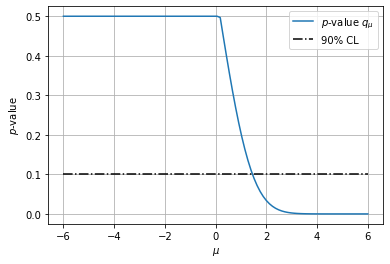

In [10]:
mu0, mu1, nmus = -6., 6., 100
mus    = np.linspace(mu0, mu1, nmus)
qmus   = [ht    .qmu(x0,  mui, parbest = parbest) for mui in mus]
pqmus  = [htcore.qmu_pvalue(qmui)                 for qmui in qmus]
htplot.plt_wilks_pvalues(beta, mus, pqmus = pqmus);

**Exercise**: Consider an experiment with a gaussian distribution with mean $\mu$ and sigma 1. Consider $\mu_{true} = \mu_0 = 0$. Obtain the distribution of the upper limits at 90 %CL. 

**Exercise** Consider a experiment with a $n$ sample of gaussian distributed values with $\mu$ and sigma 1. Consider $\mu_{true} = \mu = 3.5$, verify that $q_\mu$ follows a half-$\chi^2$ distribution with one dof.

---

## 5. Nuissance parameters 

Consider a counting experiment with a control region that is $\tau$ times larger than the signal region. In both regions the expected background events is $\nu$, while in the signal region $\nu + \mu$. 

**Explore** in the following toy the generation of some events, with different values of $\nu$, $\mu$.

We are interested on measuring $\mu$ and estimating $\nu$ from the control sample. $\nu$ is a nuisance parameter, how we can treat it?

bkg events : 39 signal events : 6


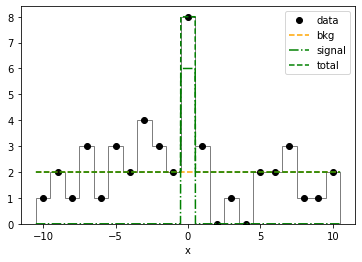

In [11]:
mu, nu, tau = 6, 2, 20
httoys.poisson_control_rvs(mu, nu, tau, tau + 1);


We can extend the likelihood to estimate the nuisance parameter, $\nu$, and use:

$$
t_\mu = -2 \ln \frac{\mathcal{L}(x \, | \mu, \, \hat{\nu}(\mu, x))}{ \mathcal{L}(x \, | \, \hat{\mu}(x), \hat{\nu} (x))}
$$

where $\hat{\nu}(x)$ is the best estimate given $x$, and $\hat{\nu}(\mu, x)$ is the best estimate when fixing $\mu$ and given $x$.


And use the test statistics $q_0$ and $q_\mu$ to test the null and the composite hypothesis and set a CI for $\mu$ using $t_\mu$.

**Example:** Consider an experiment that search for a signal $\nu+\mu$. The background, $\nu$, is measured in a independent region, called *control* region, where there is no signal, and an expected background $\tau \nu$, where $\tau$ is known. Consider $\nu$ as the nuisance parameter. The experiment observes $k$ events in the control and signal region. Consider an experiment with $k=4$, $\tau = 40$, $\nu = 2$ and $\mu = 10$. What is the range of $\mu$ excluded at 90 %CL. Compute $q_0$, is there a discovery, and observation? 


This is a prototype of a search. The pdf is:

$$
g(n, \, m \, | \, \mu, \, \nu) = \frac{(\nu+\mu )^m \, e^{-(\nu + \mu)}}{m!} \, \frac{(\tau \nu)^n \, e^{-\tau \nu}}{n!}
$$

where $m$ are the events in the signal region and $n$ are the events in the control region. 



**Exercise**: First, we check that the pdf, $g( t_\mu | \mu, \nu)$ is a $\chi^2(2)$ with two dof, and $g(t_\mu | \mu, \hat{\nu}(\mu))$ a $\chi^2(1)$ with one dof.

**Example**: Generate an observed data, $x_0$, for an experiment with a control and a signal region. The control region follows a poisson with $\tau \nu$, and the signal $\nu + \mu$. Consider the case $\tau = 20$, $\nu = 2$ and $\mu = 6$.

Compute:

a) The p-value with the null hypothesis $\mu=0$.

b) The lower value of the upper CI at 90% using $q_\mu$

c) the central CI at 90% CL using $t_\mu$

Generate an experiment, $x_0$, compute $\hat{\mu}(x_0), \, \hat{\nu}(x_0)$, and $\hat{\nu}(\mu, x_0)$ for fix $\mu$.

In [12]:
mu, nu, tau = 6., 2., 20.
par, mask, masknu  = (mu, nu, tau), (True, True, False), (False, True, False)

# generate an observation and obtain the best-estimate of mu, nu and nu given mu
rv      = htcata.poisson_control_signal
x0      = rv.rvs(*par, size =1)[0]
ht      = htcore.htcomposite(rv, par, mask = mask, masknu = masknu) 
parbest = ht.parbest(x0)
nubest  = ht.parmubest(x0, mu)

print('mu, nu true   :', mu, nu)
print('events in control, signal region :', x0[0], x0[1])
print('events in control region/tau     :', x0[0]/tau)
print('par best :', parbest)
print('par best :', nubest, ' fix mu at ', mu)

mu, nu true   : 6.0 2.0
events in control, signal region : 37.0 5.0
events in control region/tau     : 1.85
par best : [ 3.14996555  1.85000468 20.        ]
par best : [ 6.          1.81728516 20.        ]  fix mu at  6.0


Compute $t_\mu(x_0)$, $q_0(x_0)$ and $q_\mu(x_0)$ as a function of $\mu$. 

In [13]:
mu0, mu1, nmus = 2., 20., 100
mus    = np.linspace(mu0, mu1, nmus)
q0     = ht.q0(x0, 0.)
tmus   = [ht.tmu      (x0, mi, parbest = parbest) for mi in mus]
qmus   = [ht.qmu      (x0, mi, parbest = parbest) for mi in mus]

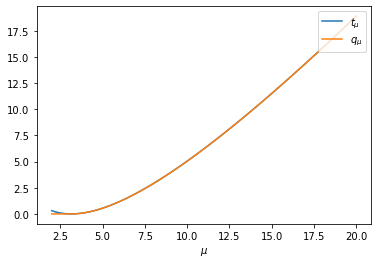

In [14]:
plt.plot(mus, tmus, label = r'$t_\mu$');
plt.plot(mus, qmus, label = r'$q_\mu$');
plt.xlabel(r'$\mu$'); plt.legend(loc = 1);

Compute p-values for $q_0(x_0)$, $t_\mu(x_0)$ and $q_\mu(x_0)$ as set a upper limit and a CI.

In [15]:
# compute the CI using tmu, and upper limit using qmu
beta = 0.90
pts = [htcore.tmu_pvalue(tmu) for tmu in tmus]
pqs = [htcore.qmu_pvalue(qmu) for qmu in qmus]
ci_upper   = ht.qmu_ulim(x0, beta = beta, parbest = parbest);
ci_central = ht.tmu_cint(x0, beta = beta, parbest = parbest);

H0 p-value  0.03272191027354576 Z-value  1.8422142246679785
upper limit : [6.60588413] at  90 % CL
central CI  : [0.25116516 7.80185687] at  90 % CL


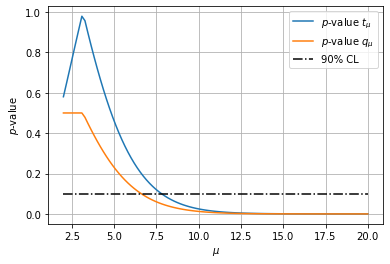

In [16]:
print('H0 p-value ', htcore.q0_pvalue(q0), 'Z-value ', np.sqrt(q0))
htplot.prt_wilks_pvalues(beta, ci_central, ci_upper)
htplot.plt_wilks_pvalues(beta, mus, pts, pqs)

**Example**: Generate now $m$ experiments, and obtain the $\hat{\mu}, \hat{\nu}$ distributions.

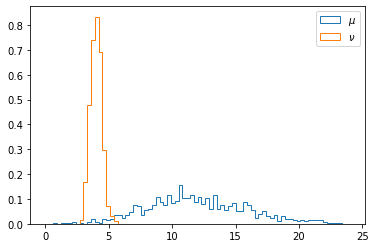

In [17]:
mu, nu, tau, size  = 12., 4., 20., 1000
htexam.poisson_control_muhat_hist(mu, nu, tau, size)

**Example** In the following plot we show the p-value of the an observed data $x_0$ in the plane $(\mu, \nu)$. They are computed assuming that $t_\mu(x)$ follows a $\chi^2$ pdf with 2 dof. The * in the plot is best-estimate point, $(\hat{\mu}(x_0), \hat{\nu}(x_0))$, and the line the best nuisance parameter $\hat{\nu}(\mu, x_0)$ as a funcion of $\mu$. 

data     : (48.0, 14.0)
best par : [9.20001667 4.80000312]
central CI : [ 3.76409659 16.36610927]


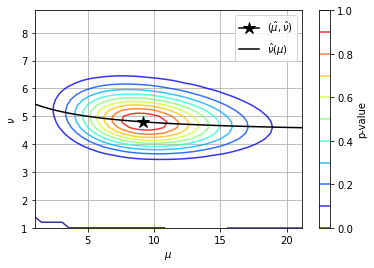

In [18]:
mu, nu, tau = 12., 4., 10.
htexam.poisson_control_ci(mu, nu, tau);

Notice that at p-value 0.1 corresponde the CI region of 90% CL and the proyection onto the $\mu$ axis in the 90% CL for the $\mu$ parameter when $\nu$ is considered a nuisance.

---